In [1]:
from ddrnet_23_slim import DualResNet as DualResNet_tens
from DDRNet_23_slim_official import DualResNet_imagenet_off
from pretrained_model_mapping import set_weight
from comparison_test import test
import torch
import numpy as np
import keras
import tensorflow as tf
from comparison_test import test

In [2]:
net = DualResNet_imagenet_off(pretrained=True)
weight_net = net.state_dict()
torch_model = net.eval()

In [3]:
model= DualResNet_tens((224, 224, 3), 3, 19, comparison_test=True)
set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)

In [4]:
torch_model = torch_model.eval()
  
torch_inputs = torch.Tensor(np.random.rand(1, 3, 224, 224))

tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
with torch.no_grad():
    torch_output = torch_model(torch_inputs)

tf_output = model.predict(tf_inputs)

In [5]:
res = []
res_all = []

for num in [3, 6, 9, 12]:
    
    model= DualResNet_tens((224, 224, 3), num, 19, comparison_test=True)
    set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)
    
    torch_inputs = torch.Tensor(np.random.rand(num, 3, 224, 224))

    tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
    with torch.no_grad():
        torch_output = torch_model(torch_inputs)

    tf_output = model.predict(tf_inputs)
    
    for i in range(16):
            res.append(test(torch_output, tf_output, i))
            
    res_all.append(res)
    res = []

Max difference in conv1 is :8.344650268554688e-07 and avg is: 4.670491193792259e-08
Max difference in layer1 is :2.6226043701171875e-06 and avg is: 2.230817699455656e-07
Max difference in layer2 is :2.682209014892578e-06 and avg is: 2.708690942654357e-07
Max difference in layer3 is :2.2649765014648438e-06 and avg is: 2.1037082831298903e-07
Max difference in layer3_ is :4.1425228118896484e-06 and avg is: 4.3579922248682124e-07
Max difference in down3 is :2.9355287551879883e-06 and avg is: 1.4069138387640123e-07
Max difference in copression3 is :4.0531158447265625e-06 and avg is: 3.789332367887255e-07
Max difference in layer4 is :2.473592758178711e-06 and avg is: 2.8654801553784637e-07
Max difference in layer4_ is :6.139278411865234e-06 and avg is: 5.340545499166183e-07
Max difference in down4 is :1.8477439880371094e-06 and avg is: 1.5384856055788987e-07
Max difference in compression4 is :5.841255187988281e-06 and avg is: 4.7563850102960714e-07
Max difference in layer5_ is :3.57627868652

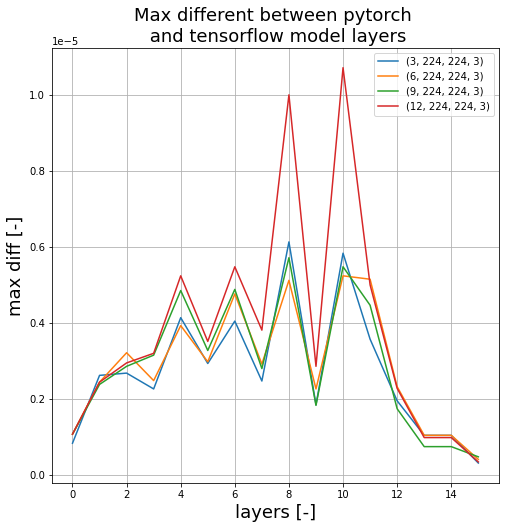

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))


plt.plot(res_all[0])
plt.plot(res_all[1])
plt.plot(res_all[2])
plt.plot(res_all[3])

plt.ylabel('max diff [-]', fontsize=18)
plt.xlabel('layers [-]', fontsize=18)
plt.title('Max different between pytorch \n and tensorflow model layers'
          , fontsize=18)
plt.grid()
plt.legend([(3, 224, 224, 3),(6, 224, 224, 3), (9, 224, 224, 3), 
            (12, 224, 224, 3)])
plt.show()